# 1º PART NOTEBOOK

# Credits

"GAME OF GREEN \\ URBAN GREEN ANALYSIS TOOLBOX" is a project of IAAC, Institute for Advanced Architecture of Catalonia developed in the Master in Advanced Computation for Architecture & Design in 2021/22 by:

Students:
CHARBEL BALISS, LUCIA LEVA, JUMANA HAMDANI, JACINTO MOROS

Faculty:
ANGELOS CHRONIS

Faculty Assistants:
Nariddh Khean
Aleksandra Jastrzebska
Serjoscha Düring


TAGS: python, OSM, osmnx, pandas, geopandas, k-means, green, clustering, prediction, analyze, climate

# INTRODUCTION

This notebook is used to:

*   Extract data from:
  *   Study points dataset from QGIS
  *   OSM using OSMNX library (https://www.openstreetmap.org/)
  *   The POWER Project by NASA using it's API (https://power.larc.nasa.gov/)
  Provides solar and meteorological data sets from NASA research for support of renewable energy, building energy efficiency and agricultural needs.
  *   Open Data from Austria's Goverment Web (https://www.data.gv.at/)
  *   Public Open Data (https://public.opendatasoft.com/)
  *   NEIGHBOR METHOD :https://automating-gis-processes.github.io/site/notebooks/L3/nearest-neighbor-faster.html


- Process data
- Create graph network
- Define green scoring criteria
- Apply and add scoring to study points dataset
- Export processed data and feed into K-Means notebook


# 1. Dependencies

In [ ]:
# install packages
!pip install pyproj
!pip install geopandas
!pip install pandana
!pip install pyshp
!pip install basemap
!pip install geoalchemy2
!pip install osmnx 
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
!pip install momepy

!pip install mapclassify

# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive

# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot

!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 4.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 3.9 MB/s 
     |████████████████████████████████| 16.7 MB 149 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.4 MB/s 
     |████████████████████████████████| 4.3 MB 32.5 MB/s 
  Attempting uninstall: tables
    Found existing installation: tables 3.7.0
    Uninstalling tables-3.7.0:
      Successfully uninstalled tables-3.7.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 2.8 MB/s 
     |████████████████████████████████| 1.0 MB 28.2 MB/s 
     |████████████████████████████████| 11.2 MB 43.7 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 930 kB 37.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 155632 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 243 kB 4.1 MB/s 
     |████████████████████████████████| 2.4 MB 47.0 MB/s 
     |████████████████████████████████| 2.1 MB 31.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Selecting previously unselected package libarchive-dev:amd64.
(Reading datab

In [ ]:
#Import libraries
import pandas as pd
import geopandas as gpd 
import pandas as pd
import os, sys, time, json, urllib3, requests, multiprocessing
import shapely
import numpy as np
import psycopg2
import networkx as nx
import multiprocessing as mp
import pandana as pdna
import h5py
import shapefile
import pyproj
import matplotlib.pyplot as plt
import osmnx as ox
import folium
import libarchive
import pydot
import cartopy
import random
import glob
import momepy
import numpy as np

from collections import Counter
from datetime import datetime
from shapely.geometry import LineString
from shapely.ops import unary_union, substring
from pandas.io.json import json_normalize
from shapely.geometry import Point
from pandana import Network
from mpl_toolkits.basemap import Basemap
from shapely import ops
from shapely import wkt
from shapely.geometry import Polygon, LineString, Point, box
from pandana import Network
from geoalchemy2 import Geometry, WKTElement
from sqlalchemy import *
from shapely.geometry import *
from fiona.crs import from_epsg
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

pd.options.display.max_rows = 120

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string
/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


AttributeError: ignored

In [ ]:
#connect google drive to this colab
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
%cd

### NEAREST NEIBOUR DEFINITION

In [ ]:
from sklearn.neighbors import BallTree
import numpy as np

def get_nearest(src_points, candidates, k_neighbors=1):
    """Find nearest neighbors for all source points from a set of candidate points"""

    # Create tree from the candidate points
    tree = BallTree(candidates, leaf_size=15, metric='haversine')

    # Find closest points and distances
    distances, indices = tree.query(src_points, k=k_neighbors)

    # Transpose to get distances and indices into arrays
    distances = distances.transpose()
    indices = indices.transpose()

    # Get closest indices and distances (i.e. array at index 0)
    # note: for the second closest points, you would take index 1, etc.
    closest = indices[0]
    closest_dist = distances[0]

    # Return indices and distances
    return (closest, closest_dist)


def nearest_neighbor(left_gdf, right_gdf, return_dist=False):
    """
    For each point in left_gdf, find closest point in right GeoDataFrame and return them.

    NOTICE: Assumes that the input Points are in WGS84 projection (lat/lon).
    """

    left_geom_col = left_gdf.geometry.name
    right_geom_col = right_gdf.geometry.name

    # Ensure that index in right gdf is formed of sequential numbers
    right = right_gdf.copy().reset_index(drop=True)

    # Parse coordinates from points and insert them into a numpy array as RADIANS
    left_radians = np.array(left_gdf[left_geom_col].apply(lambda geom: (geom.x * np.pi / 180, geom.y * np.pi / 180)).to_list())
    right_radians = np.array(right[right_geom_col].apply(lambda geom: (geom.x * np.pi / 180, geom.y * np.pi / 180)).to_list())

    # Find the nearest points
    # -----------------------
    # closest ==> index in right_gdf that corresponds to the closest point
    # dist ==> distance between the nearest neighbors (in meters)

    closest, dist = get_nearest(src_points=left_radians, candidates=right_radians)

    # Return points from right GeoDataFrame that are closest to points in left GeoDataFrame
    closest_points = right.loc[closest]

    # Ensure that the index corresponds the one in left_gdf
    closest_points = closest_points.reset_index(drop=True)

    # Add distance if requested
    if return_dist:
        # Convert to meters from radians
        earth_radius = 6371000  # meters
        closest_points['distance'] = dist * earth_radius

    return closest_points

# 2. Selecting Features

## 2.1 Places for OSMNx data extraction

### Vienna

In [ ]:
places = ["Vienna, Austria",]

crs = 3416 #EPSG of Vienna

### Override timeout in order to be able to process more data


In [ ]:
ox.utils.config(timeout=1500)

## 2.2 Import NETWORK for visualization

In [ ]:
# Download pedestrian network from OSM using graph_from_place:
%time G_walk = ox.graph_from_place(places, network_type="walk")

CPU times: user 2min 4s, sys: 2.66 s, total: 2min 6s
Wall time: 3min 6s


In [ ]:
# Impute missing edge speeds and calculate edge travel times with the speed module:
G_walk = ox.speed.add_edge_speeds(G_walk)
G_walk = ox.speed.add_edge_travel_times(G_walk)

In [ ]:
#Retrieve nodes and edges from the graph
nodes, edges = ox.graph_to_gdfs(G_walk)
pednet = edges
pednet_crs = edges

In [ ]:
# reprojecting epsg 4386 (wgs84) to epsg specified above
# pednet = gpd.GeoDataFrame(pednet, crs="epsg:4326", geometry='geometry')
pednet = pednet.to_crs(crs)
pednet.crs

In [ ]:
### remove length column to avoid confusion
## pednet = pednet[['OBJECTID', 'road_type', 'sdwlk_code', 'sdwlk_desc', 'crosswalk', 'cwalk_type', 'px', 'px_type','geometry']]
## pednet.drop(columns=['junction','bridge','service','width','access','tunnel','area','from','to'],inplace=True)
pednet.drop(columns=['bridge','service','width','access','tunnel'],inplace=True)
# pednet.dropna(subset=['geometry'],inplace=True)
pednet.head(2)

In [ ]:
pednet.plot(column='travel_time', markersize=0.2, alpha=0.5, figsize=(50,50), scheme='quantiles', k=10,
               legend=True)

## 2.3 Import study points done in QGIS

In [ ]:
# Specify the filepath to the geojson study points
filepath_address ='/content/gdrive/MyDrive/Colab Notebooks/STUDIO AI COLAB NOTEBOOKS/save_Vienna/Copy of vienna_addresstreets.geojson'
address = gpd.read_file(filepath_address)
address['x'] = address.geometry.x
address['y'] = address.geometry.y
address['tag'] = 'studyPoints'
address = address[['tag', 'geometry', 'x', 'y' ]]
address.head(2)



tag                       geometry              x              y
0  studyPoints  POINT (624848.721 483160.047)  624848.721067  483160.047251
1  studyPoints  POINT (624847.201 483150.163)  624847.201065  483150.163447

In [ ]:
# Reprojecting study point to epsg specified
address_crs = address.to_crs(4326)
address_crs.crs
address_crs['x'] = address_crs.geometry.x
address_crs['y'] = address_crs.geometry.y
address_crs.crs
address_crs.dropna(subset=['geometry'],inplace=True)
address_crs.head(2)

tag                   geometry          x          y
0  studyPoints  POINT (16.36016 48.20876)  16.360165  48.208759
1  studyPoints  POINT (16.36014 48.20867)  16.360139  48.208671

In [ ]:
type(address['geometry'][0])

### Explore Study Points

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


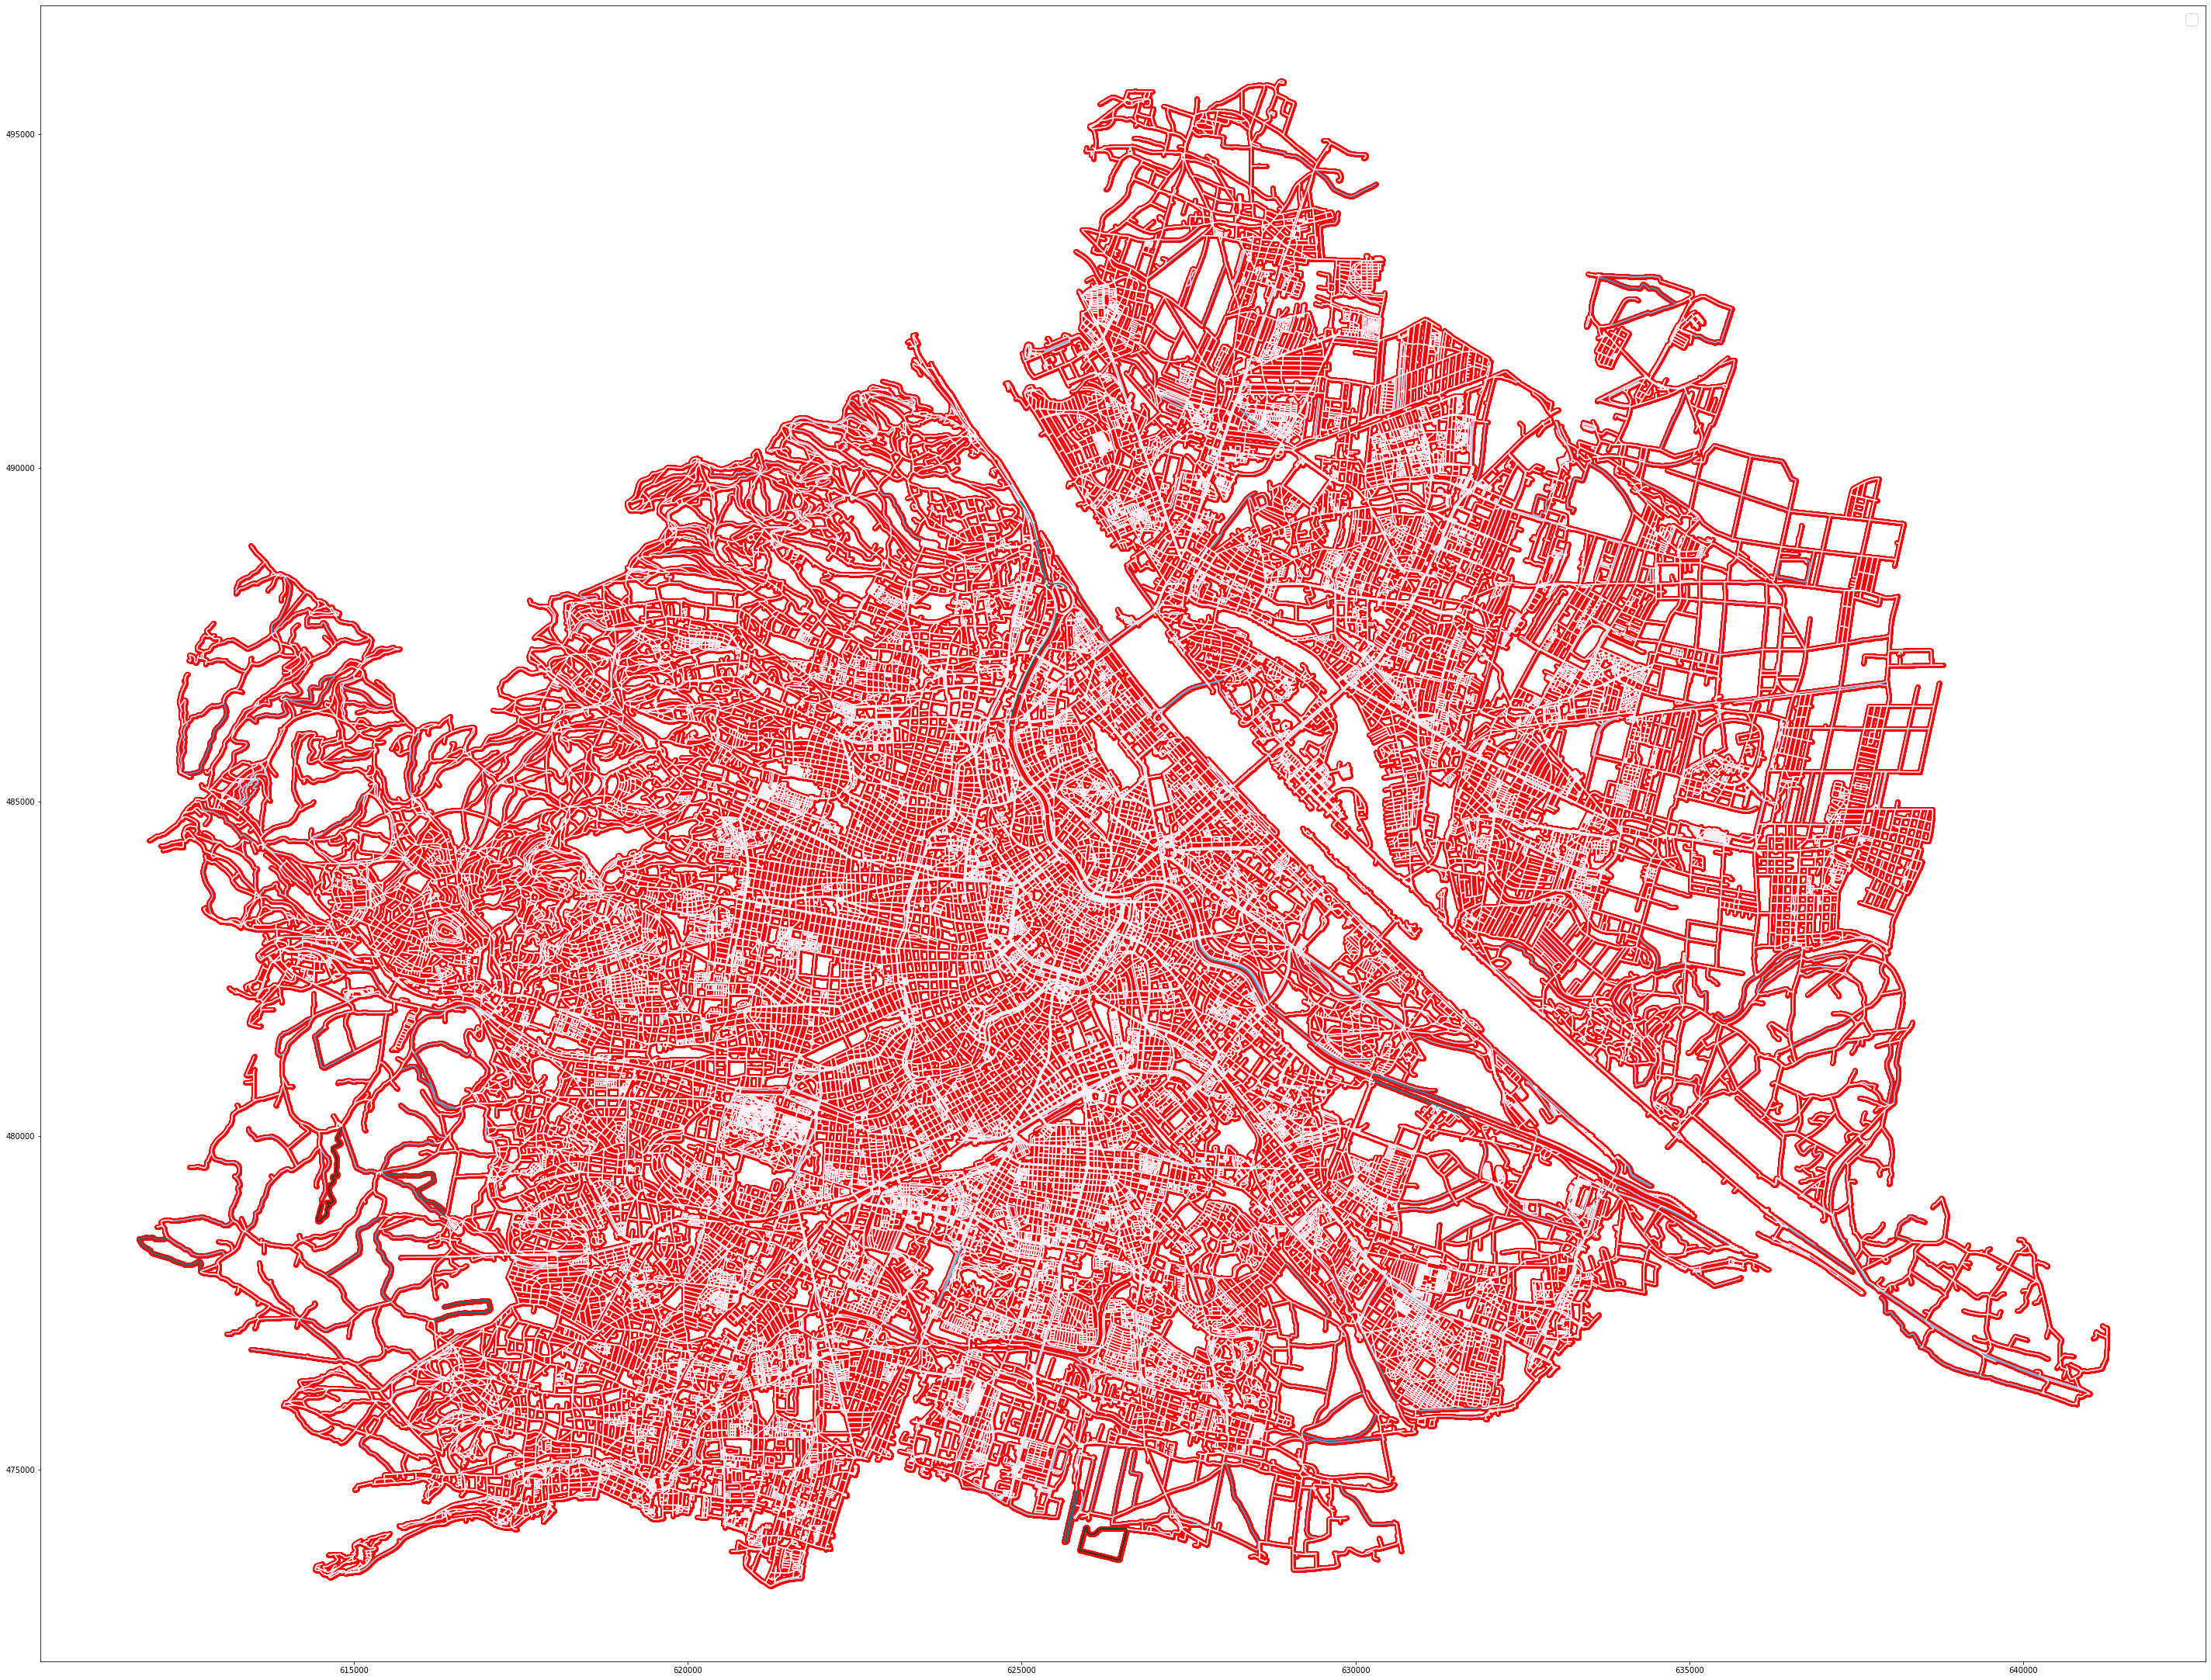

In [ ]:
#PLOTTING
f2, ax2 = plt.subplots(figsize=(50, 50))
# area.plot(ax=ax2, facecolor='gray')  #FROM OSMNX
address.plot(ax=ax2,color='red')  #FROM OPENDATA
pednet.plot('length',ax=ax2,cmap='PuBuGn', legend=False)  #FROM OPENDATA
plt.legend(fontsize=20) # using a size in points
plt.show()

## 2.4 Import water, landuse & tree features ---------[PHYSICS]

### 2.4.1 Import OSM key features

In [ ]:
# Selecting keys to extract green & water features from OSM
tags_amen = {
    'amenity':True,
    'leisure':True,
    'landuse':True,
    'natural':True,
    'water': True,
    'waterway': True,
}

In [ ]:
# Downloading amenity data from OSM:
%time OSM_locations = ox.geometries.geometries_from_place(places, tags=tags_amen)
OSM_locations.head(2)

/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:872: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  outer_polygons_with_holes.extend(list(outer_polygon))
/usr/local/lib

CPU times: user 1min 44s, sys: 16.4 s, total: 2min
Wall time: 7min 57s


source                   geometry    amenity recycling:glass_bottles recycling:green_waste recycling:paper recycling_type  ele      name natural highway check_date created_by addr:city addr:country addr:housenumber addr:postcode addr:street brand brand:wikidata brand:wikipedia contact:phone fuel:adblue:canister fuel:diesel fuel:octane_100 fuel:octane_95 wheelchair leisure odbl traffic_sign river:waterway_distance waterway seamark:type  bus network public_transport cuisine opening_hours takeaway toilets:wheelchair designation barrier bicycle foot maxheight maxwidth obstacle seamark:name access traffic_calming operator direction contact:website addr:unit healthcare check_date:opening_hours operator:wikidata operator:wikipedia website alt_name  atm indoor_seating outdoor_seating phone changing_table changing_table:location description:en  fee heritage heritage:operator museum name:bg name:de name:ja name:ko name:ru name:uk name:zh old_name ref:at:bda tourism  \
element_type osmid                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
node         1634625    NaN  POINT (16.29701 48.18111)  recycling                     yes                   yes             yes      container  NaN       NaN     NaN     NaN        NaN        NaN       NaN          NaN              NaN           NaN         NaN   NaN            NaN             NaN           NaN                  NaN         NaN             NaN            NaN        NaN     NaN  NaN          NaN                     NaN      NaN          NaN  NaN     NaN              NaN     NaN           NaN      NaN                NaN         NaN     NaN     NaN  NaN       NaN      NaN      NaN          NaN    NaN             NaN      NaN       NaN             NaN       NaN        NaN                      NaN               NaN                NaN     NaN      NaN  NaN            NaN             NaN   NaN            NaN                     NaN            NaN  NaN      NaN               NaN    NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN      NaN        NaN     NaN   
             5866425    NaN  POINT (16.29330 48.20320)        NaN                     NaN                   NaN             NaN            NaN  255  Flohberg    peak     NaN        NaN        NaN       NaN          NaN              NaN           NaN         NaN   NaN            NaN             NaN           NaN                  NaN         NaN             NaN            NaN        NaN     NaN  NaN          NaN                     NaN      NaN          NaN  NaN     NaN              NaN     NaN           NaN      NaN                NaN         NaN     NaN     NaN  NaN       NaN      NaN      NaN          NaN    NaN             NaN      NaN       NaN             NaN       NaN        NaN                      NaN               NaN                NaN     NaN      NaN  NaN            NaN             NaN   NaN            NaN                     NaN            NaN  NaN      NaN               NaN    NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN      NaN        NaN     NaN   

                     wikidata wikipedia disp

### 2.4.2 Import water features

In [ ]:
# Picking only way water
OSM_locations_ways = OSM_locations.loc[['way'],['geometry','name','amenity','leisure','landuse','natural','water','waterway','start_date']]
OSM_locations_ways.dropna(subset=['geometry'],inplace=True)
OSM_locations_ways = OSM_locations_ways.reset_index(level=[0,1]) #deal with multiindex column names
OSM_locations_ways=OSM_locations_ways.explode()
# Create "tag" for custom labeling
OSM_locations_ways['tag'] = np.nan
OSM_locations_ways['type'] = OSM_locations_ways['geometry'].apply(str)
OSM_locations_ways = OSM_locations_ways.loc[OSM_locations_ways['type'].str.contains("LINE", case=False)]

#water
OSM_locations_ways.loc[OSM_locations_ways.loc[:,'amenity']=='drinking_water','tag'] = 'water'
OSM_locations_ways.loc[OSM_locations_ways.loc[:,'amenity']=='water_point','tag'] = 'water'
OSM_locations_ways.loc[OSM_locations_ways.loc[:,'amenity']=='watering_place','tag'] = 'water'
OSM_locations_ways.loc[OSM_locations_ways.loc[:,'water']==OSM_locations_ways.loc[:,'water'],'tag'] = 'water'
OSM_locations_ways.loc[OSM_locations_ways.loc[:,'waterway']==OSM_locations_ways.loc[:,'waterway'],'tag'] = 'water'
OSM_locations_ways.loc[OSM_locations_ways.loc[:,'natural']=='water','tag'] = 'water'

OSM_locations_ways['length'] = OSM_locations_ways['geometry'].length
OSM_locations_ways = OSM_locations_ways.sort_values(by=['length'], ascending=False)

OSM_locations_ways = OSM_locations_ways.loc[OSM_locations_ways['tag'] == 'water']
OSM_locations_ways = OSM_locations_ways.head(25)
OSM_locations_ways.reset_index(drop=True, inplace=True)

OSM_locations_ways

In [ ]:
#EXPLOIRE WATER POLYGON PLOTTING
f2, ax2 = plt.subplots(figsize=(50, 50))
# area.plot(ax=ax2, facecolor='gray')  #FROM OSMNX
OSM_locations_ways.plot(ax=ax2,color='cyan')  #FROM OPENDATA

In [ ]:
col = OSM_locations_ways.columns.tolist()
# print(col)
# # new GeoDataFrame with same columns
nodes = gpd.GeoDataFrame(columns=OSM_locations_ways.columns)
# Extraction of the polygon nodes and attributes values from polys and integration into the new GeoDataFrame
for index, row in OSM_locations_ways.iterrows():
    for j in list(row['geometry'].coords): 
        nodes = nodes.append({'element_type':row['element_type'],'osmid': int(row['osmid']),'geometry':Point(j), 'name':row['name'],'amenity':row['amenity'],'leisure':row['leisure'],'landuse':row['landuse'],'natural':row['natural'],'water':row['water'],'waterway':row['waterway'],'start_date':row['start_date'],'tag':row['tag'] },ignore_index=True)
    print(index)
nodes.head()


### 2.4.3 Import landuse features

In [ ]:
# Picking only green nodes
OSM_locations_nodes = OSM_locations.loc[['node']]
OSM_locations_nodes.dropna(subset=['geometry'],inplace=True)

# Selecting only viable columns and introducing new column 'tag'
OSM_locations_nodes = OSM_locations_nodes.loc[['node'],['geometry','name','amenity','leisure','landuse','natural','water','waterway','start_date']]
OSM_locations_nodes = OSM_locations_nodes.reset_index(level=[0,1]) #deal with multiindex column names

# Create "tag" for custom labeling
OSM_locations_nodes['tag'] = np.nan

# Assigning tags based on different column values
#greenery
OSM_locations_nodes.loc[OSM_locations_nodes.loc[:,'leisure']=='park','tag'] = 'landuse'
OSM_locations_nodes.loc[OSM_locations_nodes.loc[:,'leisure']=='garden','tag'] = 'landuse'
OSM_locations_nodes.loc[OSM_locations_nodes.loc[:,'landuse']=='allotments','tag'] = 'landuse'
OSM_locations_nodes.loc[OSM_locations_nodes.loc[:,'landuse']=='farmland','tag'] = 'landuse'
OSM_locations_nodes.loc[OSM_locations_nodes.loc[:,'landuse']=='farmyard','tag'] = 'landuse'
OSM_locations_nodes.loc[OSM_locations_nodes.loc[:,'landuse']=='flowerbed','tag'] = 'landuse'
OSM_locations_nodes.loc[OSM_locations_nodes.loc[:,'landuse']=='forest','tag'] = 'landuse'
OSM_locations_nodes.loc[OSM_locations_nodes.loc[:,'landuse']=='meadow','tag'] = 'landuse'
OSM_locations_nodes.loc[OSM_locations_nodes.loc[:,'landuse']=='orchard','tag'] = 'landuse'
OSM_locations_nodes.loc[OSM_locations_nodes.loc[:,'landuse']=='vineyard','tag'] = 'landuse'
OSM_locations_nodes.loc[OSM_locations_nodes.loc[:,'landuse']=='aquaculture','tag'] = 'landuse'
OSM_locations_nodes.loc[OSM_locations_nodes.loc[:,'landuse']=='basin','tag'] = 'landuse'
OSM_locations_nodes.loc[OSM_locations_nodes.loc[:,'landuse']=='	salt_pond','tag'] = 'landuse'
OSM_locations_nodes.loc[OSM_locations_nodes.loc[:,'landuse']=='	brownfield','tag'] = 'landuse'
OSM_locations_nodes.loc[OSM_locations_nodes.loc[:,'landuse']=='	garages','tag'] = 'landuse'
OSM_locations_nodes.loc[OSM_locations_nodes.loc[:,'landuse']=='grass','tag'] = 'landuse'
OSM_locations_nodes.loc[OSM_locations_nodes.loc[:,'landuse']=='	greenfield','tag'] = 'landuse'
OSM_locations_nodes.loc[OSM_locations_nodes.loc[:,'landuse']=='greenhouse_horticulture','tag'] = 'landuse'
OSM_locations_nodes.loc[OSM_locations_nodes.loc[:,'landuse']=='	landfill','tag'] = 'landuse'
OSM_locations_nodes.loc[OSM_locations_nodes.loc[:,'landuse']=='	plant_nursery','tag'] = 'landuse'
OSM_locations_nodes.loc[OSM_locations_nodes.loc[:,'landuse']=='	recreation_ground','tag'] = 'landuse'
OSM_locations_nodes.loc[OSM_locations_nodes.loc[:,'landuse']=='village_green','tag'] = 'landuse'
OSM_locations_nodes.loc[OSM_locations_nodes.loc[:,'natural']!= 'tree','tag'] = 'landuse'

OSM_locations_nodes = OSM_locations_nodes.loc[OSM_locations_nodes['tag'] == 'landuse']

OSM_locations_nodes.head()

element_type     osmid                   geometry        name    amenity leisure landuse natural water waterway start_date      tag
0         node   1634625  POINT (16.29701 48.18111)         NaN  recycling     NaN     NaN     NaN   NaN      NaN        NaN  landuse
1         node   5866425  POINT (16.29330 48.20320)    Flohberg        NaN     NaN     NaN    peak   NaN      NaN        NaN  landuse
2         node  15079895  POINT (16.28689 48.19691)         NaN  telephone     NaN     NaN     NaN   NaN      NaN        NaN  landuse
3         node  15337840  POINT (16.27995 48.19791)         OMV       fuel     NaN     NaN     NaN   NaN      NaN        NaN  landuse
4         node  29801740  POINT (16.39496 48.23346)  McDonald's  fast_food     NaN     NaN     NaN   NaN      NaN        NaN  landuse

In [ ]:
# Joining water & landuse
frames = [nodes,OSM_locations_nodes]
target_locations = pd.concat(frames)
target_locations.reset_index(drop=True, inplace=True)
# Dropping nodes w/o any tag:
target_locations.dropna(subset=['tag'],inplace=True)
target_locations.reset_index(drop=True, inplace=True)
target_locations['start_date'] = target_locations['start_date'].replace("-", "",True)
target_locations['start_date'] = target_locations['start_date'].str[:4]
target_locations['start_date'] = target_locations['start_date'].fillna('1990')
target_locations['start_date'] = target_locations['start_date'].astype(float)
target_locations_save = target_locations.loc[:,['start_date', 'tag','geometry']]

### 2.4.4 Import tree features

In [ ]:
# Specify the url for web feature service
trees = gpd.read_file('https://data.wien.gv.at/daten/geo?service=WFS&request=GetFeature&version=1.1.0&typeName=ogdwien:BAUMKATOGD&srsName=EPSG:4326&outputFormat=shape-zip')
trees.head(2)

OBJECTID   BAUM_ID DATENFUEHR  BEZIRK             OBJEKT_STR          GEBIETSGRU                            GATTUNG_AR  PFLANZJAHR PFLANZJAH0  STAMMUMFAN STAMMUMFA0  BAUMHOEHE BAUMHOEHE_  KRONENDURC KRONENDUR0 BAUMNUMMER                   geometry
0  465392036.0  201854.0  magistrat    11.0  11., Hyblerpark, MA42  MA 42 - Parkanlage                Prunus spec. (Kirsche)      2000.0       2000        45.0      45 cm        2.0     6-10 m         2.0      4-6 m        183  POINT (16.41210 48.18186)
1  465392037.0  194214.0  magistrat     1.0   01., Stadtpark, MA42  MA 42 - Parkanlage  Koelreuteria paniculata (Blasenbaum)      1987.0       1987        82.0      82 cm        3.0    11-15 m         2.0      4-6 m       2014  POINT (16.37986 48.20604)

In [ ]:
# Select only needed columns
new_trees = trees
new_trees = new_trees[['PFLANZJAHR', 'geometry']]
new_trees = new_trees.rename(columns={'PFLANZJAHR': 'start_date'})
new_trees['tag'] = 'trees'
new_trees["start_date"].replace({0: 2021}, inplace=True)
new_trees['start_date'] = new_trees['start_date'].fillna('2015')
new_trees['start_date'] = new_trees['start_date'].astype(float)
# for col in OSM_col_locations_save:
#   print(OSM_col_locations_save[col].unique())
new_trees

start_date                   geometry    tag
0           2000.0  POINT (16.41210 48.18186)  trees
1           1987.0  POINT (16.37986 48.20604)  trees
2           1978.0  POINT (16.47096 48.23697)  trees
3           1994.0  POINT (16.37984 48.20601)  trees
4           2019.0  POINT (16.32376 48.22995)  trees
...            ...                        ...    ...
212922      2021.0  POINT (16.35331 48.17513)  trees
212923      1968.0  POINT (16.40540 48.20735)  trees
212924      2018.0  POINT (16.44927 48.24073)  trees
212925      2021.0  POINT (16.35338 48.17504)  trees
212926      1975.0  POINT (16.44923 48.24066)  trees

[212927 rows x 3 columns]

### 2.4.5 Joining water, landuse &trees

In [ ]:
# Joining water, landuse & trees
frames2 = [target_locations_save,new_trees]
target_locations_final = pd.concat(frames2)
target_locations_final.reset_index(drop=True, inplace=True)
# Dropping nodes w/o any tag:
target_locations_final.dropna(subset=['tag'],inplace=True)
target_locations_final.reset_index(drop=True, inplace=True)
target_locations_final = target_locations_final.loc[:,['start_date', 'tag','geometry']]
target_locations_final

start_date    tag                   geometry
0           1990.0  water  POINT (16.57614 48.13556)
1           1990.0  water  POINT (16.58400 48.13375)
2           1990.0  water  POINT (16.59209 48.13264)
3           1990.0  water  POINT (16.59991 48.13207)
4           1990.0  water  POINT (16.60854 48.13226)
...            ...    ...                        ...
257657      2021.0  trees  POINT (16.35331 48.17513)
257658      1968.0  trees  POINT (16.40540 48.20735)
257659      2018.0  trees  POINT (16.44927 48.24073)
257660      2021.0  trees  POINT (16.35338 48.17504)
257661      1975.0  trees  POINT (16.44923 48.24066)

[257662 rows x 3 columns]

In [ ]:
# Dropping nodes w/o any tag:
target_locations_final_save = target_locations_final.loc[:,['start_date', 'tag','geometry']]
target_locations_final_save['longitude'] = target_locations_final_save['geometry'].x #get the point values from geometry object
target_locations_final_save['latitude'] = target_locations_final_save['geometry'].y
target_locations_final_save

start_date    tag                   geometry  longitude   latitude
0           1990.0  water  POINT (16.57614 48.13556)  16.576136  48.135562
1           1990.0  water  POINT (16.58400 48.13375)  16.584002  48.133746
2           1990.0  water  POINT (16.59209 48.13264)  16.592090  48.132641
3           1990.0  water  POINT (16.59991 48.13207)  16.599909  48.132075
4           1990.0  water  POINT (16.60854 48.13226)  16.608536  48.132263
...            ...    ...                        ...        ...        ...
257657      2021.0  trees  POINT (16.35331 48.17513)  16.353311  48.175129
257658      1968.0  trees  POINT (16.40540 48.20735)  16.405402  48.207352
257659      2018.0  trees  POINT (16.44927 48.24073)  16.449272  48.240729
257660      2021.0  trees  POINT (16.35338 48.17504)  16.353381  48.175038
257661      1975.0  trees  POINT (16.44923 48.24066)  16.449232  48.240660

[257662 rows x 5 columns]

In [ ]:
# Reprojecting to epsg specified above, currently
target_locations_final_save.crs = "EPSG:4326"
target_locations_save_crs = target_locations_final_save.to_crs(crs)
target_locations_save_crs.crs
target_locations_save_crs['x'] = target_locations_save_crs.geometry.x
target_locations_save_crs['y'] = target_locations_save_crs.geometry.y
target_locations_save_crs = target_locations_save_crs.rename(columns={'name':'value' })
target_locations_save_crs = target_locations_save_crs[['start_date', 'tag', 'geometry', 'x', 'y']]
target_locations_save_crs.head(2)

start_date    tag                       geometry              x              y
0      1990.0  water  POINT (641222.653 475677.498)  641222.653333  475677.497789
1      1990.0  water  POINT (641815.881 475500.320)  641815.881021  475500.320288

In [ ]:
type(target_locations_save_crs['geometry'][0])

shapely.geometry.point.Point

#### Explore Water, Landuse & Trees

In [ ]:
# explore target_locations_save_crs tags
target_locations_save_crs.pivot_table(index=['tag'], aggfunc='size')

tag
landuse     41245
trees      212927
water        3490
dtype: int64

In [ ]:
# if you want to explore by tagselect tag to explore
target_locations_save_crs_explore = target_locations_save_crs.loc[target_locations_save_crs['tag'] == 'water']
target_locations_save_crs_explore.reset_index(drop=True, inplace=True)
target_locations_save_crs_explore.head(2)

start_date    tag                       geometry              x              y
0      1990.0  water  POINT (641222.653 475677.498)  641222.653333  475677.497789
1      1990.0  water  POINT (641815.881 475500.320)  641815.881021  475500.320288

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


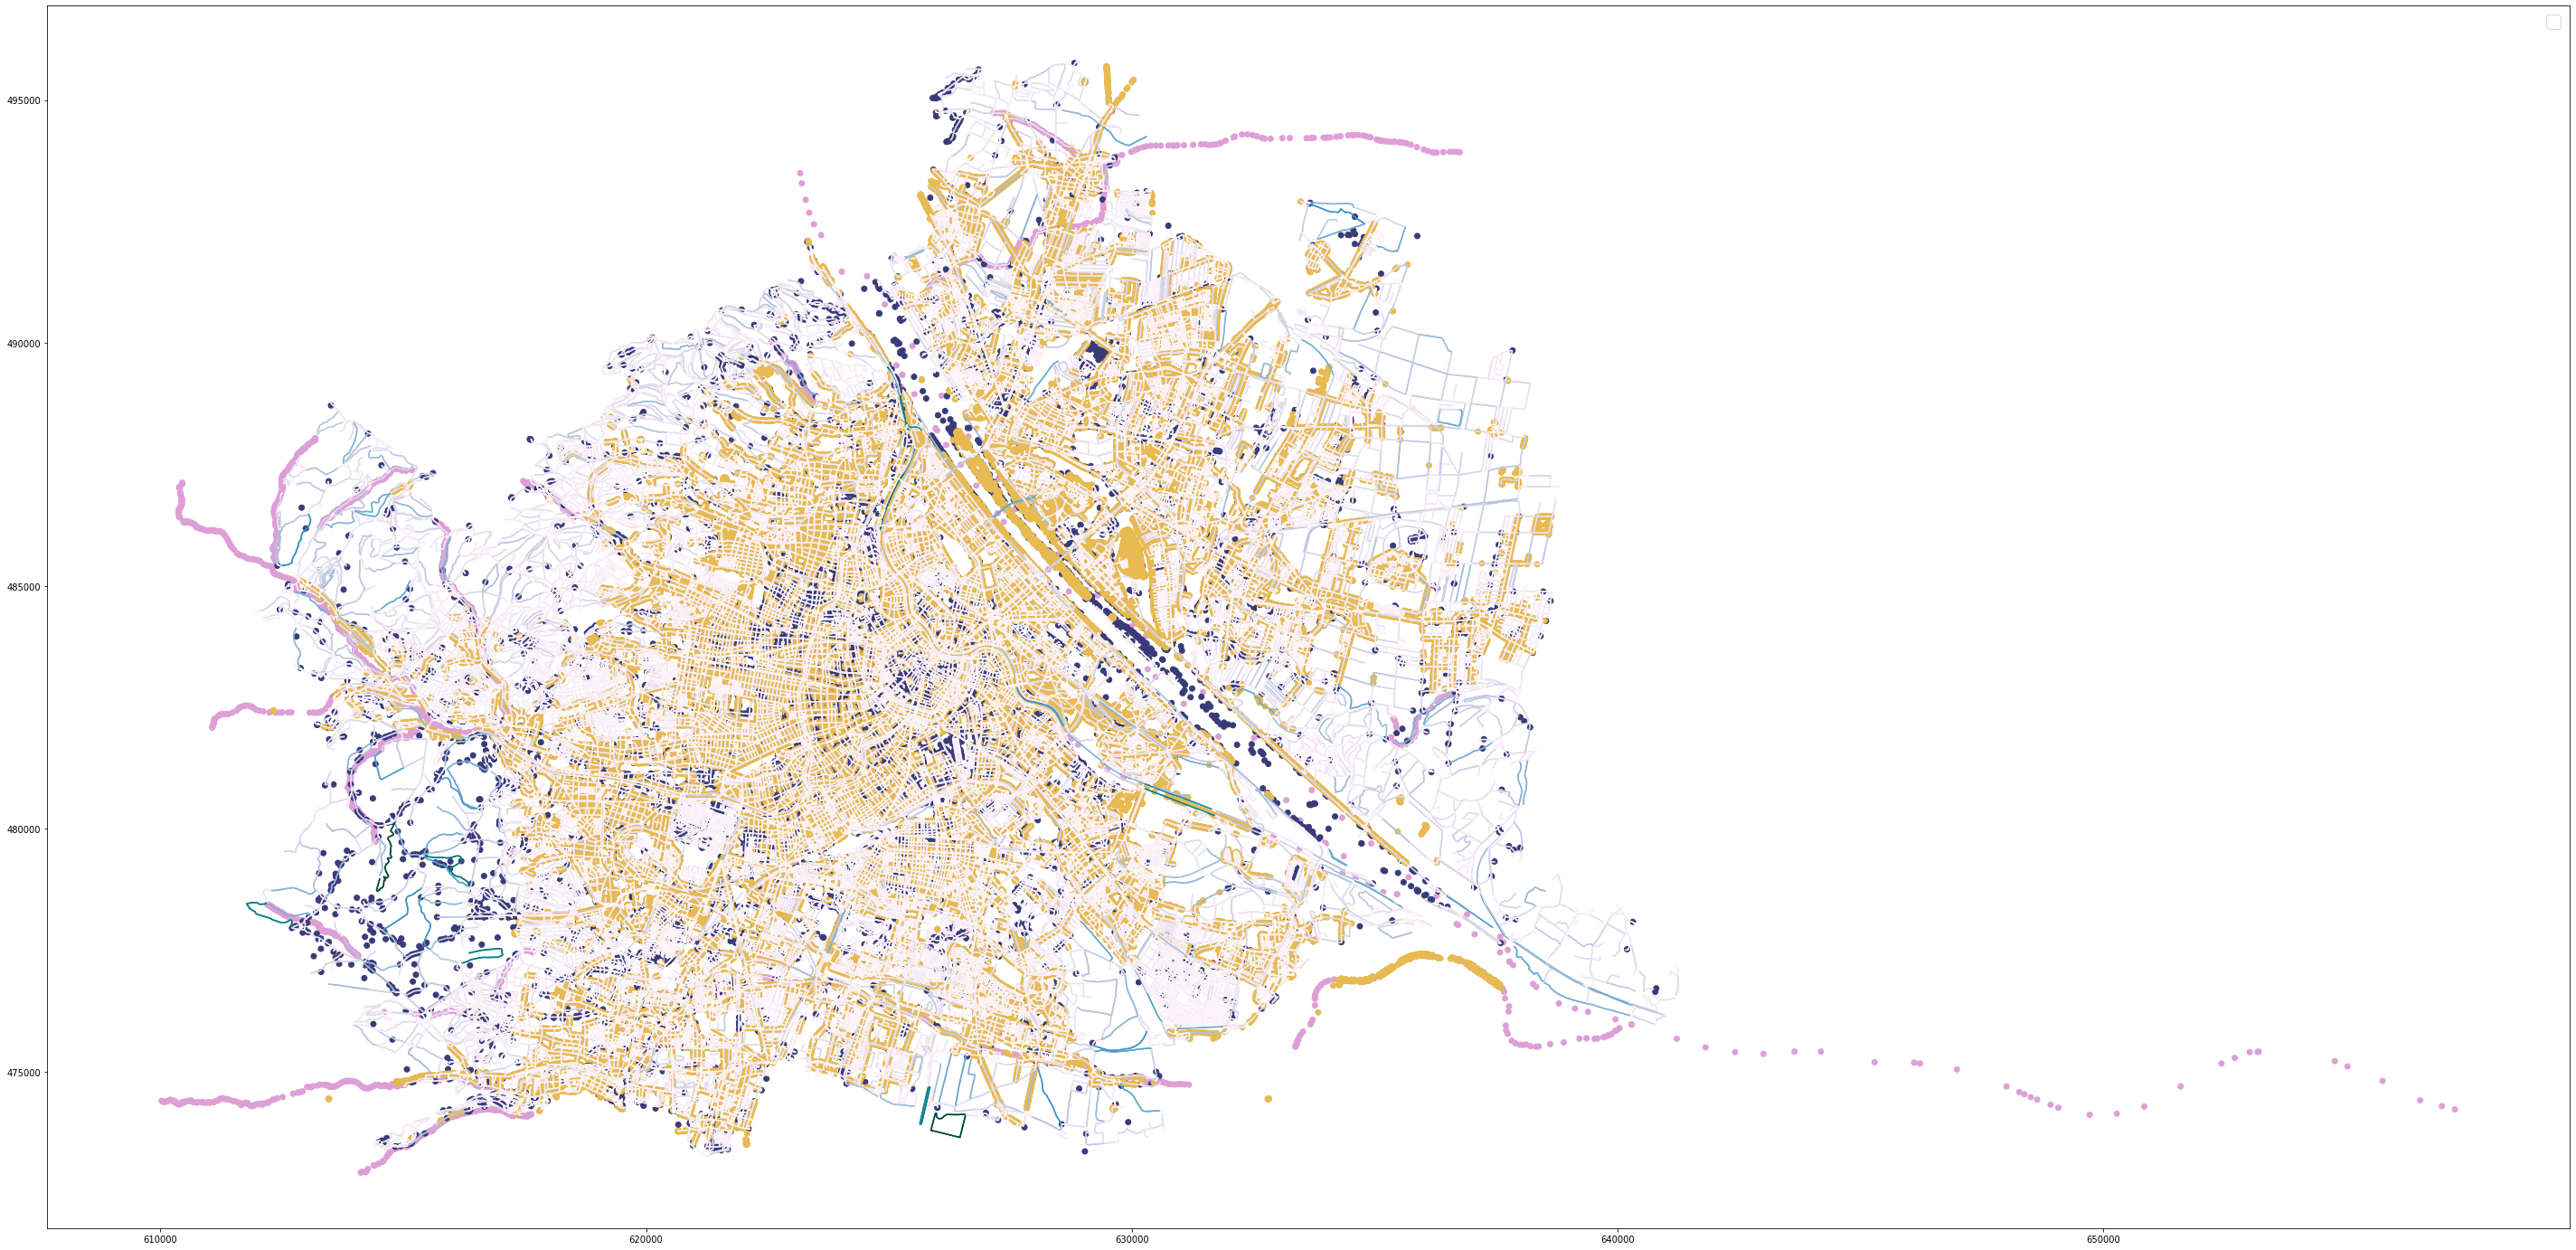

In [ ]:
#PLOTTING
f2, ax2 = plt.subplots(figsize=(50, 50))
# area.plot(ax=ax2, facecolor='gray')  #FROM OSMNX
target_locations_save_crs.plot('tag',ax=ax2,cmap='tab20b', legend=True)  #FROM OPENDATA
pednet.plot('length',ax=ax2,cmap='PuBuGn', legend=False)  #FROM OPENDATA
plt.legend(fontsize=20) # using a size in points
plt.show()

## 2.5 Import Earth Temperature, Wind Speed, Wind Direction, Humidity, Sky Cover, Earth Tempreature, Precipitation, Direct Illumiinance, Diffuse Illuminance & Irridiation from https://power.larc.nasa.gov/ -----------------[TARGET]

### 2.5.1 Import NASA CLIMATE DATA

In [ ]:
# Reprojecting study point to epsg specified
address_nasa = address.to_crs(4326)
address_nasa.crs
address_nasa['x'] = address_nasa.geometry.x
address_nasa['y'] = address_nasa.geometry.y
address_nasa.crs
address_nasa.dropna(subset=['geometry'],inplace=True)
address_nasa.head(2)

tag                   geometry          x          y
0  studyPoints  POINT (16.36016 48.20876)  16.360165  48.208759
1  studyPoints  POINT (16.36014 48.20867)  16.360139  48.208671

In [ ]:
locations = list(zip(address_nasa["y"], address_nasa["x"]))
random_address_locations = address_nasa.sample(n = 1)
random_address_locations.reset_index(drop=True, inplace=True)
random_address_locations_xy = list(zip(random_address_locations["y"], random_address_locations["x"]))
random_address_locations.head()


tag                   geometry          x         y
0  studyPoints  POINT (16.39688 48.14956)  16.396882  48.14956

In [ ]:
# OPCIÓN A
# ####datetime object containing current date and time
# now = datetime.now()
# # dd/mm/YY H:M:S
# dt_string = now.strftime('%Y%m%d')
# print("date and time =", dt_string)

# dt_string = int(dt_string)
# dt_string = dt_string - 200
# dt_string = str(dt_string)
# dt_string

# OPCION B
dt_string = '20211231'
dt_stringfrom = '19901231'

parameters = 'T2M,WS2M,WD2M,QV2M,CLOUD_AMT,TS,PW,DIRECT_ILLUMINANCE,DIFFUSE_ILLUMINANCE,ALLSKY_SFC_UVA'

url = "https://power.larc.nasa.gov/api/temporal/daily/point?parameters="+parameters+"&community=RE&longitude={longitude}&latitude={latitude}&start="+dt_stringfrom+"&end="+dt_string+"&format=JSON"

data = []
base_url = url
for latitude, longitude in random_address_locations_xy:
    api_request_url = base_url.format(longitude=longitude, latitude=latitude)
    response = requests.get(url=api_request_url, verify=True, timeout=300.00) 
    content = json.loads(response.content.decode('utf-8'))
    dfa = pd.json_normalize(content['geometry'])
    dfb = pd.json_normalize(content['properties'])
    dfc = dfa.join(dfb)
    data.append(dfc)

result = pd.concat(data)
result.head(2)


type                                       coordinates  parameter.T2M.19901231  parameter.T2M.19910101  parameter.T2M.19910102  parameter.T2M.19910103  parameter.T2M.19910104  parameter.T2M.19910105  parameter.T2M.19910106  parameter.T2M.19910107  parameter.T2M.19910108  parameter.T2M.19910109  parameter.T2M.19910110  parameter.T2M.19910111  parameter.T2M.19910112  parameter.T2M.19910113  parameter.T2M.19910114  parameter.T2M.19910115  parameter.T2M.19910116  parameter.T2M.19910117  parameter.T2M.19910118  parameter.T2M.19910119  parameter.T2M.19910120  parameter.T2M.19910121  parameter.T2M.19910122  parameter.T2M.19910123  parameter.T2M.19910124  parameter.T2M.19910125  parameter.T2M.19910126  parameter.T2M.19910127  parameter.T2M.19910128  parameter.T2M.19910129  parameter.T2M.19910130  parameter.T2M.19910131  parameter.T2M.19910201  parameter.T2M.19910202  parameter.T2M.19910203  parameter.T2M.19910204  parameter.T2M.19910205  parameter.T2M.19910206  parameter.T2M.19910207  \
0  Point  [16.396882209838846, 48.149559675316645, 372.75]                    1.62                    1.25                    0.79                    5.13                    3.55                    0.93                    1.44                    2.08                    2.57                    1.89                    4.09                    5.66                    4.25                    1.18                   -2.38                   -3.83                   -5.18                   -5.28                   -4.21                   -4.12                   -4.31                   -4.24                   -4.77                   -2.67                   -2.04                   -1.62                   -3.35                   -2.93                   -3.31                   -3.64                   -4.04                   -9.92                  -11.86                   -10.3                   -9.04                   -8.57                  -11.09                  -11.16                   -7.52   

   parameter.T2M.19910208  parameter.T2M.19910209  parameter.T2M.19910210  parameter.T2M.19910211  parameter.T2M.19910212  parameter.T2M.19910213  parameter.T2M.19910214  parameter.T2M.19910215  parameter.T2M.19910216  parameter.T2M.19910217  parameter.T2M.19910218  parameter.T2M.19910219  parameter.T2M.19910220  parameter.T2M.19910221  parameter.T2M.19910222  parameter.T2M.19910223  parameter.T2M.19910224  parameter.T2M.19910225  parameter.T2M.19910226  parameter.T2M.19910227  parameter.T2M.19910228  parameter.T2M.19910301  parameter.T2M.19910302  parameter.T2M.19910303  parameter.T2M.19910304  parameter.T2M.19910305  parameter.T2M.19910306  parameter.T2M.19910307  parameter.T2M.19910308  parameter.T2M.19910309  parameter.T2M.19910310  parameter.T2M.19910311  parameter.T2M.19910312  parameter.T2M.19910313  parameter.T2M.19910314  parameter.T2M.19910315  parameter.T2M.19910316  parameter.T2M.19910317  parameter.T2M.19910318  parameter.T2M.19910319  parameter.T2M.19910320  \
0                   -6.37                   -4.27                   -0.54                   -3.38                   -5.07                   -4.83                   -5.71                   -6.61                    -2.9                   -3.78                   -3.86                   -2.09                   -0.51                    0.96                    1.39                     2.5                     4.7                    5.24                    3.55                   -0.49                   -1.35                   -0.09                    1.24                    2.59                    3.07                    1.07                    2.12                    4.91                    8.24                     7.6                    6.69                    5.98                    5.38                    6.48                    7.55                    8.97                    8.82                    7.94                    8.77                    8.51                    9.62   

   parameter.T2M.19910321  p

### NEAREST NEIBOUR DEFINITION

In [ ]:
from sklearn.neighbors import BallTree
import numpy as np

def get_nearest(src_points, candidates, k_neighbors=1):
    """Find nearest neighbors for all source points from a set of candidate points"""

    # Create tree from the candidate points
    tree = BallTree(candidates, leaf_size=15, metric='haversine')

    # Find closest points and distances
    distances, indices = tree.query(src_points, k=k_neighbors)

    # Transpose to get distances and indices into arrays
    distances = distances.transpose()
    indices = indices.transpose()

    # Get closest indices and distances (i.e. array at index 0)
    # note: for the second closest points, you would take index 1, etc.
    closest = indices[0]
    closest_dist = distances[0]

    # Return indices and distances
    return (closest, closest_dist)


def nearest_neighbor(left_gdf, right_gdf, return_dist=False):
    """
    For each point in left_gdf, find closest point in right GeoDataFrame and return them.

    NOTICE: Assumes that the input Points are in WGS84 projection (lat/lon).
    """

    left_geom_col = left_gdf.geometry.name
    right_geom_col = right_gdf.geometry.name

    # Ensure that index in right gdf is formed of sequential numbers
    right = right_gdf.copy().reset_index(drop=True)

    # Parse coordinates from points and insert them into a numpy array as RADIANS
    left_radians = np.array(left_gdf[left_geom_col].apply(lambda geom: (geom.x * np.pi / 180, geom.y * np.pi / 180)).to_list())
    right_radians = np.array(right[right_geom_col].apply(lambda geom: (geom.x * np.pi / 180, geom.y * np.pi / 180)).to_list())

    # Find the nearest points
    # -----------------------
    # closest ==> index in right_gdf that corresponds to the closest point
    # dist ==> distance between the nearest neighbors (in meters)

    closest, dist = get_nearest(src_points=left_radians, candidates=right_radians)

    # Return points from right GeoDataFrame that are closest to points in left GeoDataFrame
    closest_points = right.loc[closest]

    # Ensure that the index corresponds the one in left_gdf
    closest_points = closest_points.reset_index(drop=True)

    # Add distance if requested
    if return_dist:
        # Convert to meters from radians
        earth_radius = 6371000  # meters
        closest_points['distance'] = dist * earth_radius

    return closest_points

### 2.5.2 Import AIR QUALITY DATA

In [ ]:
# Specify the url for web feature service
airQuality = gpd.read_file('https://public.opendatasoft.com/explore/dataset/openaq/download/?format=geojson&disjunctive.city=true&disjunctive.location=true&disjunctive.measurements_parameter=true&refine.city=Wien&q=wien&timezone=Europe/Berlin&lang=en')
airQuality.head(2)

In [ ]:
# Select only needed columns
new_airQuality = airQuality
new_airQuality = new_airQuality[['measurements_value', 'geometry']]
new_airQuality = new_airQuality.rename(columns={'measurements_value': 'value_airQuality'})
new_airQuality['longitude'] = new_airQuality['geometry'].x #get the point values from geometry object
new_airQuality['latitude'] = new_airQuality['geometry'].y
new_airQuality['tag'] = 'airQuality'
new_airQuality = new_airQuality[['value_airQuality', 'tag', 'geometry', 'longitude', 'latitude' ]]
new_airQuality

#check data
new_airQuality.head(2)

value_airQuality         tag                   geometry  longitude   latitude
0          2.676727  airQuality  POINT (16.35708 48.24899)  16.357079  48.248993
1         25.055773  airQuality  POINT (16.43455 48.20306)  16.434550  48.203060

In [ ]:
print(np.unique(new_airQuality[['value_airQuality']].values))


[  0.3771395    0.48853898   1.4234209    1.8823415    2.06809997
   2.18580007   2.22200012   2.38045001   2.41805005   2.4366002
   2.59750008   2.6406002    2.67672705   2.72280001   2.77970004
   2.83860802   2.90790009   3.16620016   3.18655014   3.23432111
   3.24792814   3.52544999   3.70870018   4.15005016   4.24429988
   4.35719966   4.3885498    4.39455032   4.51039981   4.51885604
   4.59599971   4.7350502    4.83179998   4.96704959   5.08430004
   5.37779998   6.053        6.94744348   8.81584548   9.5255928
   9.84274482  12.10957336  13.99499511  14.41608047  14.72281265
  17.46627807  18.44661331  21.69970512  25.05577278  26.08458518
  41.912       46.67        52.322       60.908       61.637
 165.655      190.26198    190.98949   ]


In [ ]:
# Find closest public transport stop for each building and get also the distance based on haversine distance
# Note: haversine distance which is implemented here is a bit slower than using e.g. 'euclidean' metric
# but useful as we get the distance between points in meters
# https://automating-gis-processes.github.io/site/notebooks/L3/nearest-neighbor-faster.html
airQ_points = nearest_neighbor(address_nasa, new_airQuality, return_dist=True)

# And the result looks like ..
airQ_points

In [ ]:
def get_climate_value(parameter_string, tag):
    """Get value of specific data"""
    
    new_points = address_nasa.iloc[[0]].copy()
    for i in range(2001,2022):
      a = 'df_new_year'+str(i)
      # print(a)
      b = result.copy()
      year = parameter_string + str(i)
      c = b.filter(like=year, axis=1)
      c_new = c.copy()
      anual = str(i)
      c_new[anual] = c_new.sum(axis=1)/len(c_new.columns)
      c_new = [float(u) for u in c_new[anual]]
      new_points[anual] = c_new
      new_points['tag'] = tag

    new_points_new = new_points.melt(id_vars=["tag", "geometry", "x", "y"], var_name="start_date")
    new_points_new = new_points_new[['start_date', 'tag', 'geometry', 'x', 'y','value']]
    new_points_new['value'] = new_points_new.rename({'value': 'value_'+tag}, axis=1, inplace=True)
    new_points_new = new_points_new[['start_date', 'tag', 'geometry', 'x', 'y','value_'+tag]]
    new_points_new['start_date'] = new_points_new['start_date'].astype(float)
    new_points_new.head(2)


    # Return indices and distances
    return (new_points_new)



In [ ]:
new_points_tm = get_climate_value('T2M.', 'temperature')
new_points_tm

new_points_ws = get_climate_value('WS2M.', 'windSpeed')
new_points_ws

new_points_wd = get_climate_value('WD2M.', 'windDirection')
new_points_wd

new_points_qv = get_climate_value('QV2M.', 'humidity')
new_points_qv

new_points_CLOUD_AMT = get_climate_value('CLOUD_AMT.', 'skyCover')
new_points_CLOUD_AMT

new_points_TS = get_climate_value('TS.', 'earthTemperature')
new_points_TS

new_points_PW = get_climate_value('PW.', 'precipitationWater')
new_points_PW

new_points_DIRECT_ILLUMINANCE = get_climate_value('DIRECT_ILLUMINANCE.', 'directIlluminance')
new_points_DIRECT_ILLUMINANCE

new_points_DIFFUSE_ILLUMINANCE = get_climate_value('DIFFUSE_ILLUMINANCE.', 'diffuseIlluminance')
new_points_DIFFUSE_ILLUMINANCE

new_points_ALLSKY_SFC_UVA = get_climate_value('ALLSKY_SFC_UVA.', 'irradiation')
new_points_ALLSKY_SFC_UVA

start_date          tag                   geometry          x          y  value_irradiation
0       2001.0  irradiation  POINT (16.36016 48.20876)  16.360165  48.208759           7.111836
1       2002.0  irradiation  POINT (16.36016 48.20876)  16.360165  48.208759           7.260932
2       2003.0  irradiation  POINT (16.36016 48.20876)  16.360165  48.208759           7.787562
3       2004.0  irradiation  POINT (16.36016 48.20876)  16.360165  48.208759           7.306803
4       2005.0  irradiation  POINT (16.36016 48.20876)  16.360165  48.208759           7.648356
5       2006.0  irradiation  POINT (16.36016 48.20876)  16.360165  48.208759           7.777425
6       2007.0  irradiation  POINT (16.36016 48.20876)  16.360165  48.208759           7.827616
7       2008.0  irradiation  POINT (16.36016 48.20876)  16.360165  48.208759           7.618579
8       2009.0  irradiation  POINT (16.36016 48.20876)  16.360165  48.208759           7.597041
9       2010.0  irradiation  POINT (16.36016 48.20876)  16.360165  48.208759           7.309589
10      2011.0  irradiation  POINT (16.36016 48.20876)  16.360165  48.208759           7.776192
11      2012.0  irradiation  POINT (16.36016 48.20876)  16.360165  48.208759           7.799699
12      2013.0  irradiation  POINT (16.36016 48.20876)  16.360165  48.208759           7.345178
13      2014.0  irradiation  POINT (16.36016 48.20876)  16.360165  48.208759           7.386438
14      2015.0  irradiation  POINT (16.36016 48.20876)  16.360165  48.208759           7.591041
15      2016.0  irradiation  POINT (16.36016 48.20876)  16.360165  48.208759           7.672787
16      2017.0  irradiation  POINT (16.36016 48.20876)  16.360165  48.208759           7.793397
17      2018.0  irradiation  POINT (16.36016 48.20876)  16.360165  48.208759           7.794986
18      2019.0  irradiation  POINT (16.36016 48.20876)  16.360165  48.208759           7.712740
19      2020.0  irradiation  POINT (16.36016 48.20876)  16.360165  48.208759           7.776421
20      2021.0  irradiation  POINT (16.36016 48.20876)  16.360165  48.208759           7.830466

In [ ]:
def data(new_points,year):
  aaa = new_points.loc[new_points['start_date'] == year]
  value = aaa.iloc[:, 5].values[0]
  # value = aaa['value_temperature'].values[0]
  perc = value*(10/100)
  value2 =[]
  for i in range(len(address_nasa)):
    value3 = random.uniform(value - perc, value + perc)
    value2.append(value3)
  
  return(value2)

def year_data(year):
  address_nasa_year = address_nasa.copy()


  tempp = data(new_points_tm,year)  
  address_nasa_year['value_temperature'] = tempp

  wss = data(new_points_ws,year)  
  address_nasa_year['value_windSpeed'] = wss

  wdd = data(new_points_wd,year)  
  address_nasa_year['value_windDirection'] = wdd

  qvv = data(new_points_qv,year)  
  address_nasa_year['value_humidity'] = qvv

  clsky = data(new_points_CLOUD_AMT,year)  
  address_nasa_year['value_skyCover'] = clsky

  TSs = data(new_points_TS,year)  
  address_nasa_year['value_earthTemperature'] = TSs

  PWw = data(new_points_PW,year)  
  address_nasa_year['value_precipitationWater'] = PWw

  DIRECT_ILLUMINANCEe = data(new_points_DIRECT_ILLUMINANCE,year)  
  address_nasa_year['value_directIlluminance'] = DIRECT_ILLUMINANCEe

  DIFFUSE_ILLUMINANCEe = data(new_points_DIFFUSE_ILLUMINANCE,year)  
  address_nasa_year['value_diffuseIlluminance'] = DIFFUSE_ILLUMINANCEe

  ALLSKY_SFC_UVAa = data(new_points_ALLSKY_SFC_UVA,year)  
  address_nasa_year['value_irradiation'] = ALLSKY_SFC_UVAa

  # air quality
  year2 = str(year)
  year3 = int(year2[2:])
  a = year3/21
  b = ((a * (1 - 0.75)) / 1) + 0.75
  new_points_airQuality = airQ_points['value_airQuality'] *b
  address_nasa_year['value_airQuality'] = new_points_airQuality

  address_nasa_year['x'] = address_nasa_year.geometry.x
  address_nasa_year['y'] = address_nasa_year.geometry.y
  address_nasa_year["start_date"] = year
  address_nasa_year = address_nasa_year.loc[:,['start_date','tag','geometry','x','y','value_temperature','value_windSpeed','value_windDirection','value_humidity','value_skyCover','value_earthTemperature','value_precipitationWater','value_directIlluminance','value_diffuseIlluminance','value_irradiation','value_airQuality']]
  address_nasa_year

  return (address_nasa_year)

### Select year for data climate and export

In [ ]:
select_year = 2011
file_year_name = 'values_' + str(select_year)
file_year = 'values_' + str(select_year)
file_year = year_data(select_year)

trees_VALUE = target_locations_final_save.loc[target_locations_final_save['tag'] == 'trees']
trees_VALUE = trees_VALUE.loc[trees_VALUE['start_date'] <= select_year]
trees_VALUE.reset_index(drop=True, inplace=True)
tree_data = nearest_neighbor(file_year,trees_VALUE , return_dist=True)
tree_data
file_year['value_trees'] = tree_data['distance'] 

LANDUSE_VALUE = target_locations_final_save.loc[target_locations_final_save['tag'] == 'landuse']
LANDUSE_VALUE = LANDUSE_VALUE.loc[LANDUSE_VALUE['start_date'] <= select_year]
LANDUSE_VALUE.reset_index(drop=True, inplace=True)
landuse_data = nearest_neighbor(file_year,LANDUSE_VALUE , return_dist=True)
landuse_data
file_year['value_landuse'] = landuse_data['distance'] 

water_VALUE = target_locations_final_save.loc[target_locations_final_save['tag'] == 'water']
water_VALUE = water_VALUE.loc[water_VALUE['start_date'] <= select_year]
water_VALUE.reset_index(drop=True, inplace=True)
water_data = nearest_neighbor(file_year,water_VALUE , return_dist=True)
water_data
file_year['value_water'] = water_data['distance'] 
file_year


start_date          tag                   geometry          x          y  value_temperature  value_windSpeed  value_windDirection  value_humidity  value_skyCover  value_earthTemperature  value_precipitationWater  value_directIlluminance  value_diffuseIlluminance  value_irradiation  value_airQuality  value_trees  value_landuse  value_water
0             2011  studyPoints  POINT (16.36016 48.20876)  16.360165  48.208759           9.057585         2.407105           221.430133        6.180579       54.140886               10.336312                  1.503454             35235.361863              13519.527936           8.109360         41.114048    11.829315      24.419425  1129.146953
1             2011  studyPoints  POINT (16.36014 48.20867)  16.360139  48.208671           9.820446         2.006791           242.484363        5.616832       59.549943               10.200410                  1.546808             35086.794278              11930.878835           8.120737         41.114048    11.895987      30.715590  1122.068398
2             2011  studyPoints  POINT (16.35987 48.20870)  16.359868  48.208702           9.869096         2.126044           237.927679        6.302352       57.549057                9.587397                  1.664166             32433.635677              13737.840330           8.217292         41.114048    19.915437      29.492389  1138.990624
3             2011  studyPoints  POINT (16.36000 48.20868)  16.360000  48.208683           9.765595         2.130082           229.686128        5.587723       61.149844               10.506957                  1.488750             36397.024613              13381.648233           7.162074         41.114048    19.148611      26.409685  1130.415357
4             2011  studyPoints  POINT (16.36013 48.20866)  16.360131  48.208663           9.015601         2.285519           206.660232        6.269092       53.153247               10.427327                  1.759774             36740.623122              12385.654969           7.278626         41.114048    12.805637      31.113692  1121.723684
...            ...          ...                        ...        ...        ...                ...              ...                  ...             ...             ...                     ...                       ...                      ...                       ...                ...               ...          ...            ...          ...
824952        2011  studyPoints  POINT (16.40627 48.22463)  16.406266  48.224626          10.327598         2.327690           232.716548        6.620591       57.000518                9.692429                  1.677926             31045.363951              12082.793767           8.046371        167.611744    12.332112      33.236830   296.694087
824953        2011  studyPoints  POINT (16.40636 48.22456)  16.406359  48.224561          10.178118         2.398399           222.963442        5.576898       61.464862                9.525016                  1.558020             37192.330373              12983.912432           7.955838        167.611744    20.342308      21.120692   298.370217
824954        2011  studyPoints  POINT (16.40645 48.22450)  16.406452  48.224496           9.033935         2.065611           239.849084        6.166724       53.006499                9.243497                  1.811026             34639.406600              12139.323797           7.172292        167.611744    26.771238       9.867838   300.552977
824955        2011  studyPoints  POINT (16.40580 48.22535)  16.405801  48.225347           9.753834         2.378410           208.919321        6.333620       56.083590                8.689002                  1.592977             34183.943734              12564.446425           7.746372        167.611744    53.301568      67.401657   264.931245
824956        2011  studyPoints  POINT (16.40567 48.22532)  16.405675  48.225317           9.746086         2.025212           219.789785        6.227021       63.421941

In [ ]:
filepath_year_cliimate = '/content/gdrive/MyDrive/Colab Notebooks/STUDIO AI COLAB NOTEBOOKS/save_Vienna/geojson_values/'+str(file_year_name)+ '.geojson'
file_year.to_file(filepath_year_cliimate, driver="GeoJSON")

### Explore Climate Data BY YEAR

In [ ]:
file_year.crs
file_year_crs = file_year.to_crs(crs)
file_year_crs.crs
file_year_crs['x'] = file_year_crs.geometry.x
file_year_crs['y'] = file_year_crs.geometry.y

#PLOTTING
f2, ax2 = plt.subplots(figsize=(50, 50))
# area.plot(ax=ax2, facecolor='gray')  #FROM OSMNX
file_year_crs.plot('value_temperature',ax=ax2,cmap='summer', legend=True)  #FROM OPENDATA
# pednet.plot('length',ax=ax2,cmap='PuBuGn', legend=False)  #FROM OPENDATA
plt.legend(fontsize=20) # using a size in points
plt.show()
